In [1]:
from utils import *

In [2]:
data = loadmat("subjects/s2/S2_A1_E1.mat")
emg = data["emg"]
emg_rectified = data["emg"].copy()
stimulus = data['restimulus']
repetition = data['rerepetition']

In [3]:
# Step 1: Pre-process EMG data to calculate envelopes
# `emg_envelope` computes the moving average (envelope) for rectified EMG signals 
# based on the given stimulus and repetition indices.
emg_envelopes = emg_envelope(emg_rectified, stimulus, repetition)

# Step 2: Calculate average activations
# `emg_average_activations` computes the mean activation levels for each channel,
# stimulus, and repetition to facilitate identifying anomalous trials.

emg_average_activations = compute_emg_average_activations(emg_envelopes)
# Step 3: Identify trials to exclude
# `trial_to_exclude_all` identifies trials (repetitions) that deviate significantly 
# from the average activation using a threshold (based on standard deviation or IQR).
# - `threshold_factor`: Adjusts the sensitivity of outlier detection.
# - `use_iqr`: If True, uses interquartile range instead of standard deviation.

exclude_list = trial_to_exclude_all(emg_average_activations, threshold_factor=1.5, use_iqr=True)

# Step 4: Define feature functions
# Each feature function processes EMG data for a specific metric across channels.
# These features will be used to create the machine-learning dataset.
feature_functions = [
    mean_absolute_value,  # Computes the mean absolute value of the EMG signal.
    root_mean_square,     # Computes the root mean square of the EMG signal.
    waveform_length,      # Calculates the cumulative waveform length.
    slope_sign_changes,   # Counts the number of slope sign changes in the signal.
    variance,             # Measures the variance of the signal.
    mean_frequency,       # Estimates the mean frequency of the signal.
    maximum_amplitude     # Finds the maximum amplitude of the signal.
]

# Step 5: Build the dataset
# `build_dataset_from_ninapro` extracts features using the defined feature functions
# for the processed EMG envelopes. It also excludes the identified anomalous trials.
# - `emg_envelopes`: The processed EMG envelope data.
# - `features`: List of feature extraction functions.
# - `exclude_list`: Trials marked for exclusion to ensure clean data.
dataset, labels = build_dataset_from_ninapro(emg_envelopes, features=feature_functions, exclude_list=exclude_list)

Trials to exclude for Stimulus 1: []
Trials to exclude for Stimulus 2: [2 4]
Trials to exclude for Stimulus 3: []
Trials to exclude for Stimulus 4: [7]
Trials to exclude for Stimulus 5: []
Trials to exclude for Stimulus 6: []
Trials to exclude for Stimulus 7: []
Trials to exclude for Stimulus 8: []
Trials to exclude for Stimulus 9: [8]
Trials to exclude for Stimulus 10: []
Trials to exclude for Stimulus 11: []
Trials to exclude for Stimulus 12: [4]


In [4]:
print(dataset.shape)
print(labels.shape)

(115, 70)
(115,)


### Question 1 
 Does the data look reasonable? Did you need to remove any trials?

 Yes, in general the data looks reasonable as can be checked by the homogeinity observed within rows of the heatmap displayed below. Each row represents the mean value for a specific channel over diferent repetitions of the same movement (stimuli) thus should not change much. However we see that some columns stand out from the remaing ones. We implemented two different methods to exclude trials based on the distance to the other ones: interquartile distance and mean distribution + euclian distance. This methods will be tested later for better accuracy results.

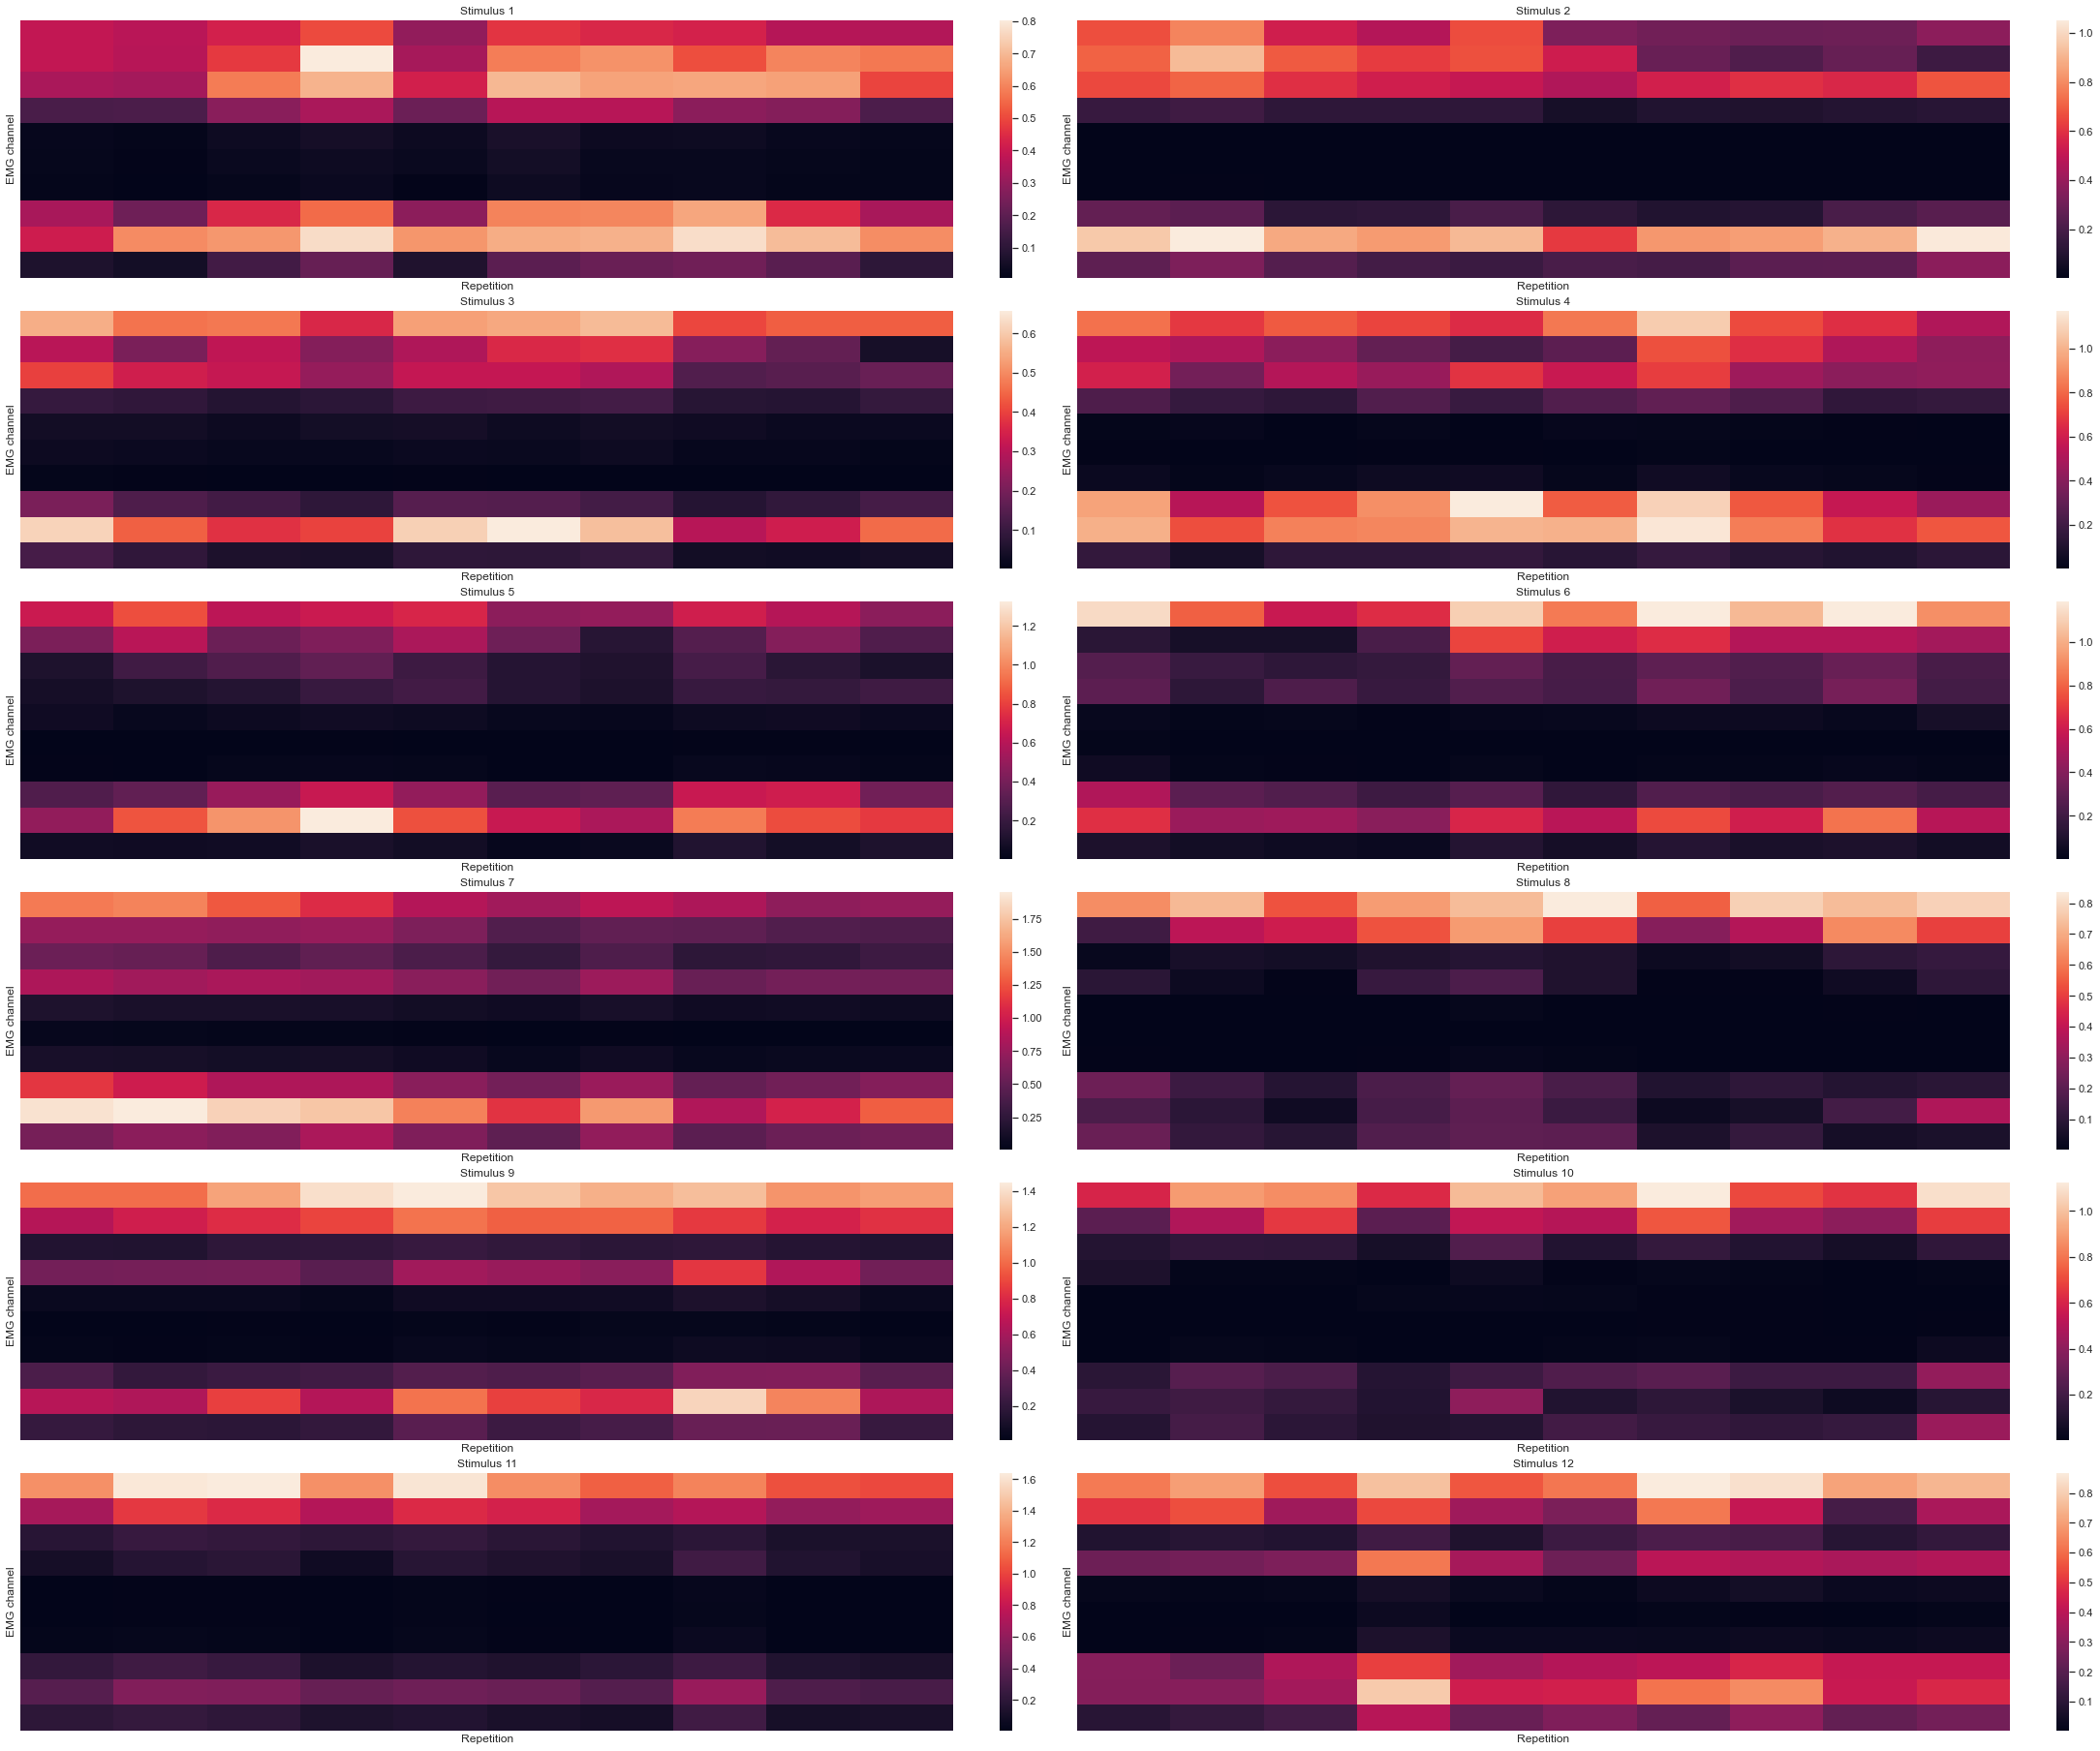

In [5]:
plot_heatmap(emg_average_activations)

### Question 2

Why do we need the different datasets?

We would answer this by answering why one could not use the same dataset. If only one dataset is used for training, validation, and testing, the model risks overfitting by memorizing the training data rather than learning generalizable patterns, leading to poor performance on new data. Evaluation on the same dataset would produce overly optimistic results that fail to reflect real-world performance. Additionally, without a separate validation set, there is no way to monitor or refine the model during training, leaving hyperparameters untuned and performance unchecked.

### Question 3
Are the values similar between repetitions and between channels?

The values show consistency in trends across repetitions of the same stimulus, as indicated by the similar shapes of the lines within each subplot. This is expected because repetitions of the same movement should activate similar muscle groups consistently, leading to reproducible patterns.

However, there is clear variability between channels, as evidenced by the distinct vertical offsets and differences in the overall shape of the curves across channels. This variation is biologically plausible since each channel corresponds to a specific electrode location, capturing activity from different muscles or muscle groups. Differences in electrode positioning, muscle activation levels, or the intrinsic properties of the muscles contribute to this channel-to-channel variability.

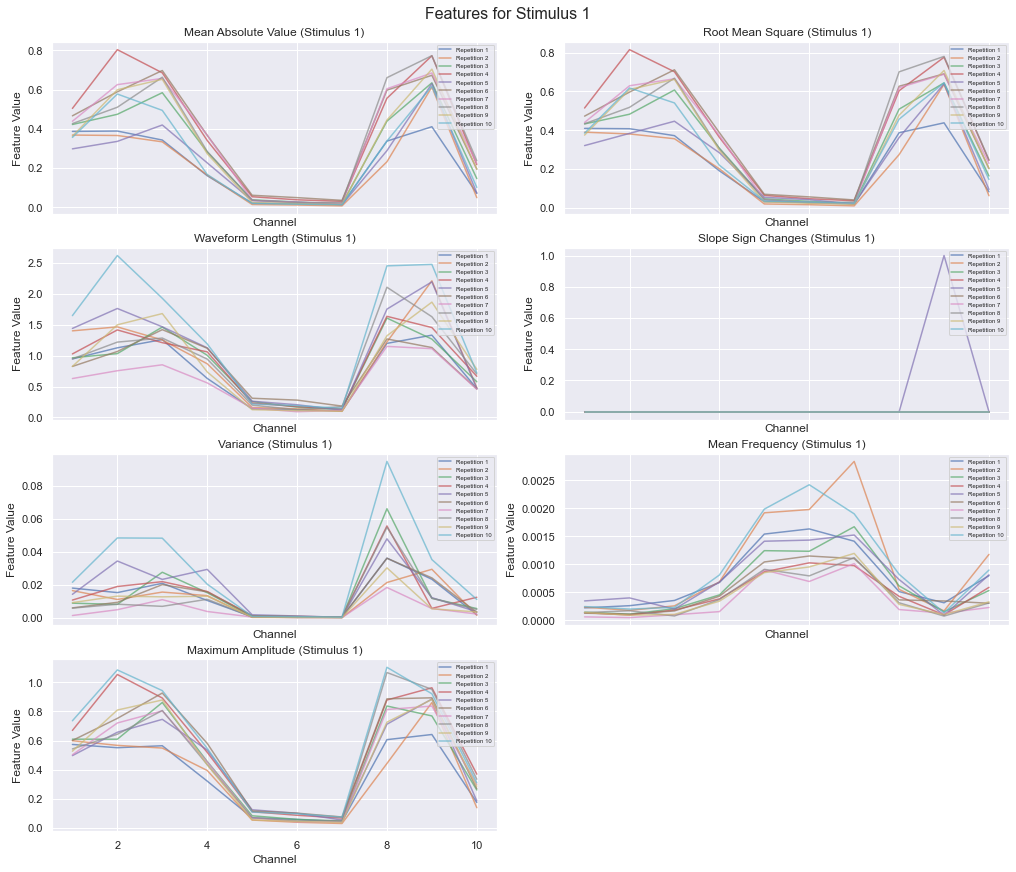

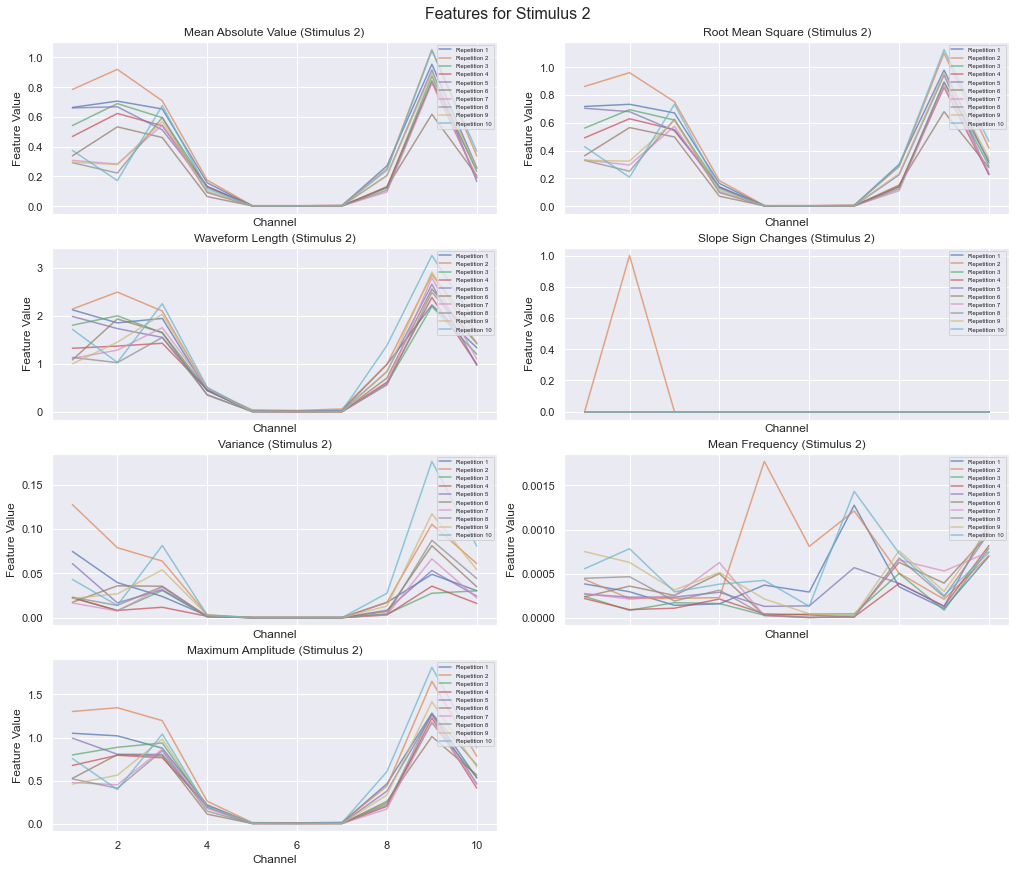

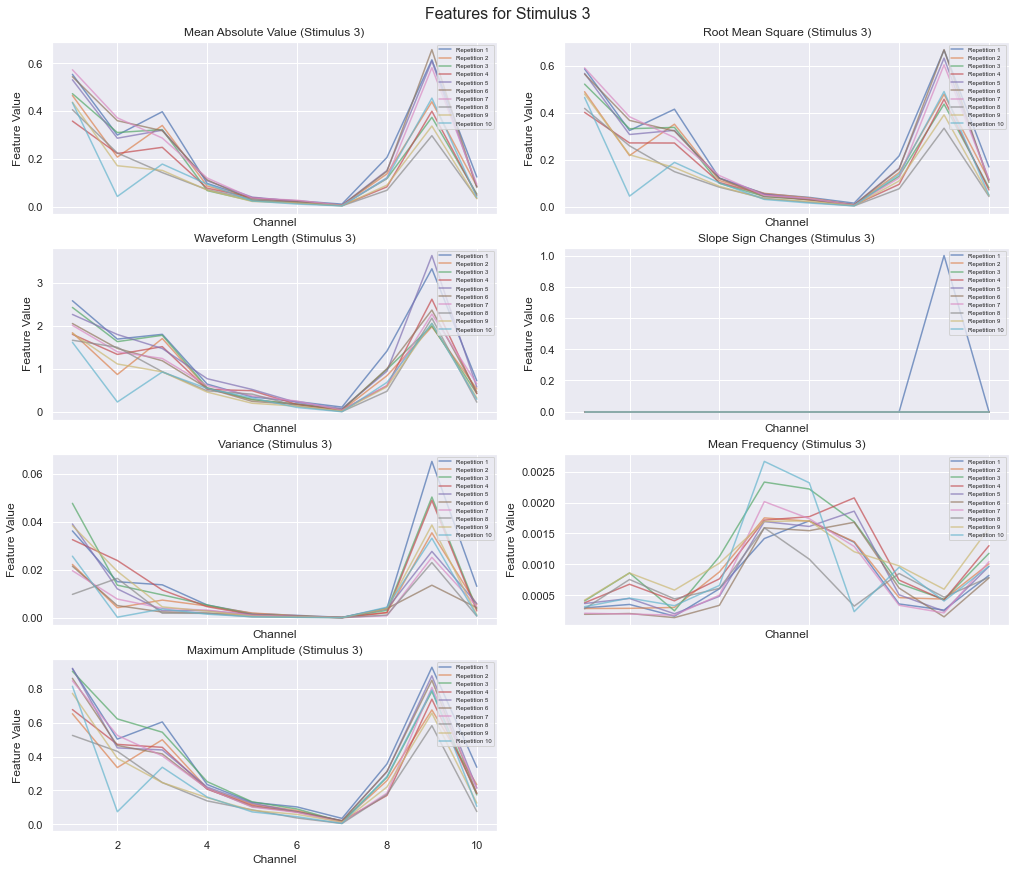

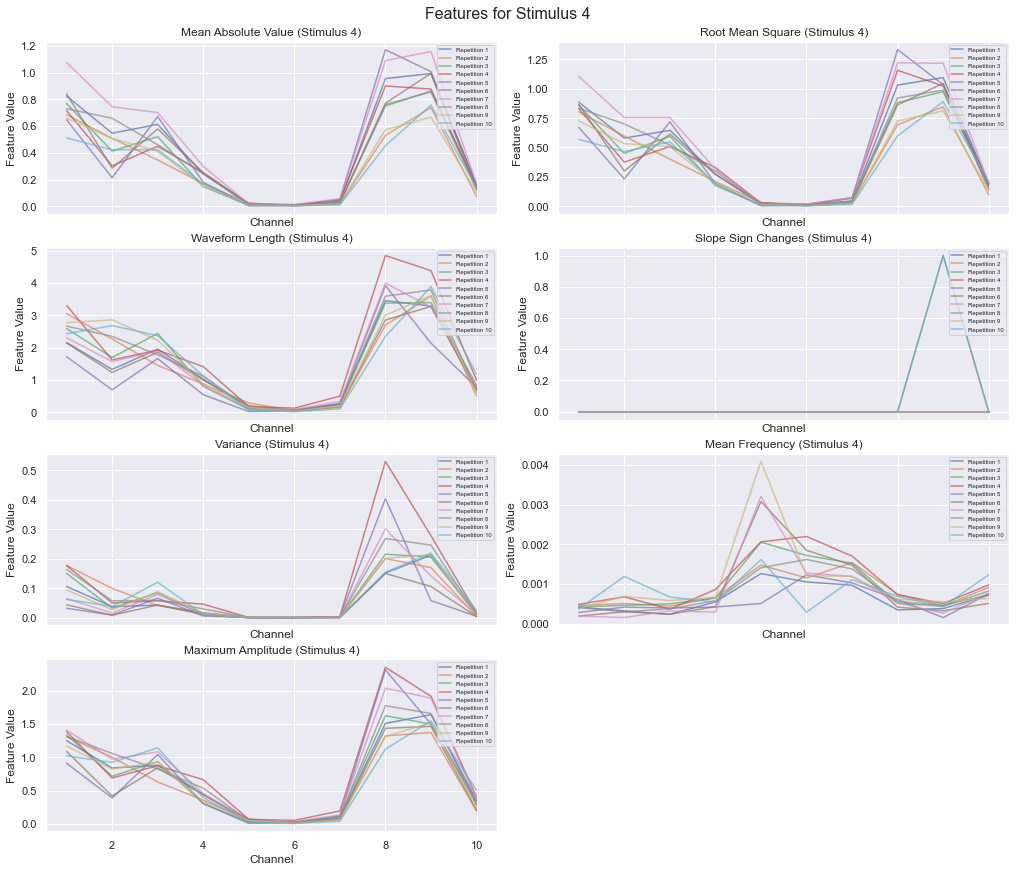

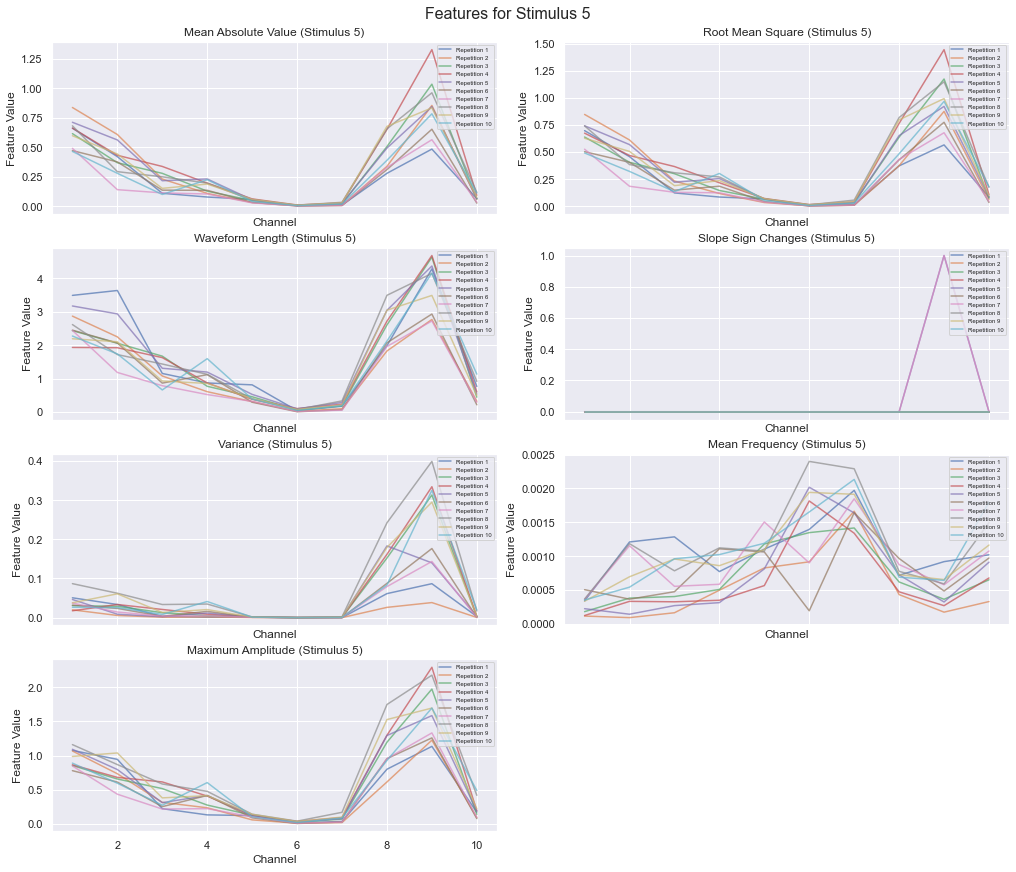

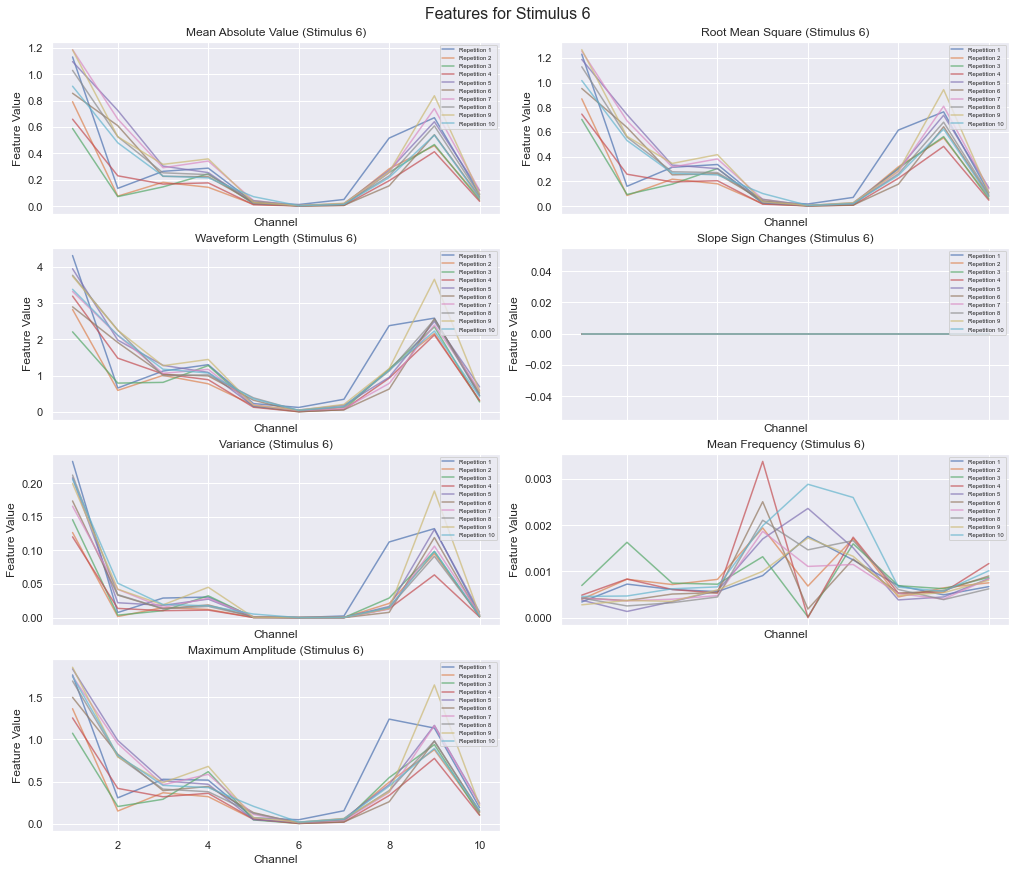

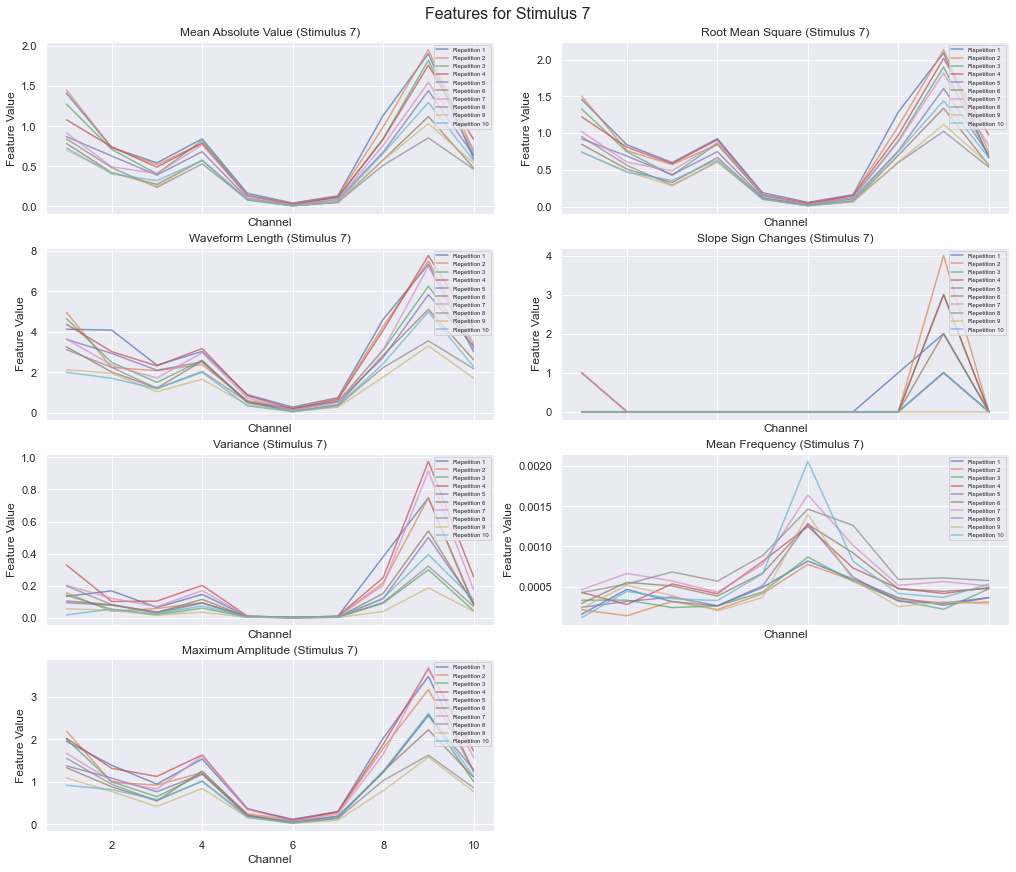

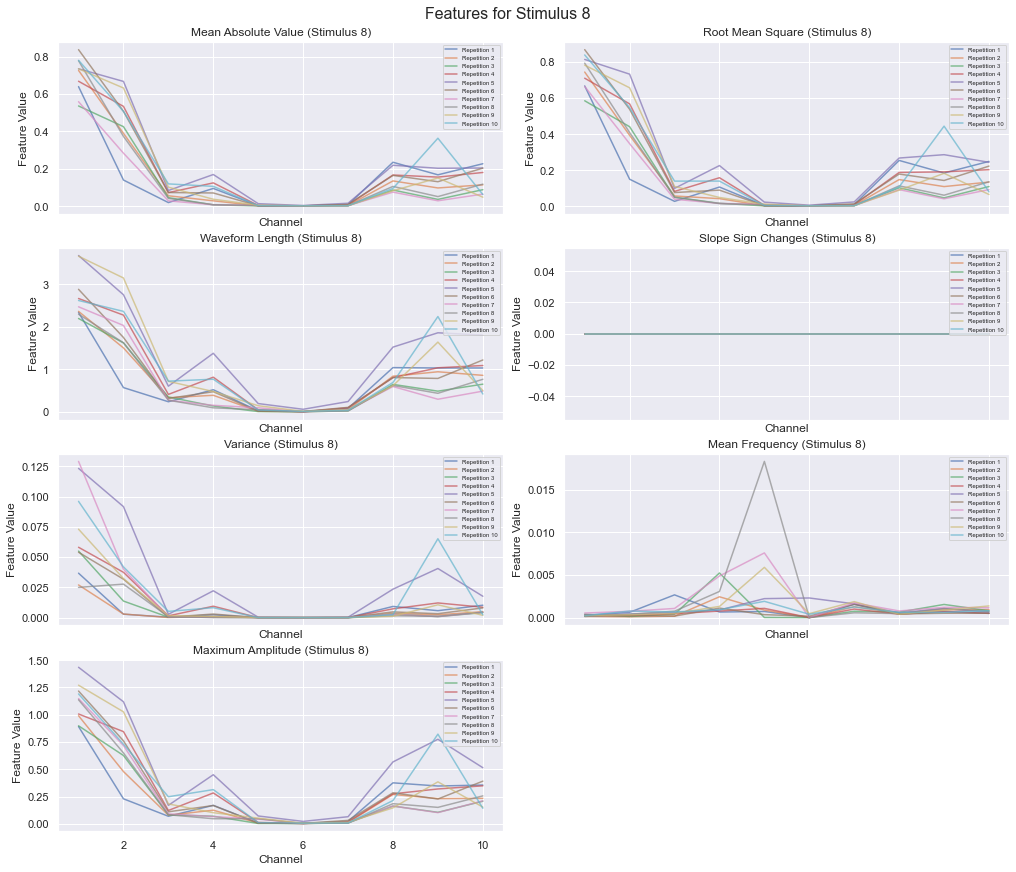

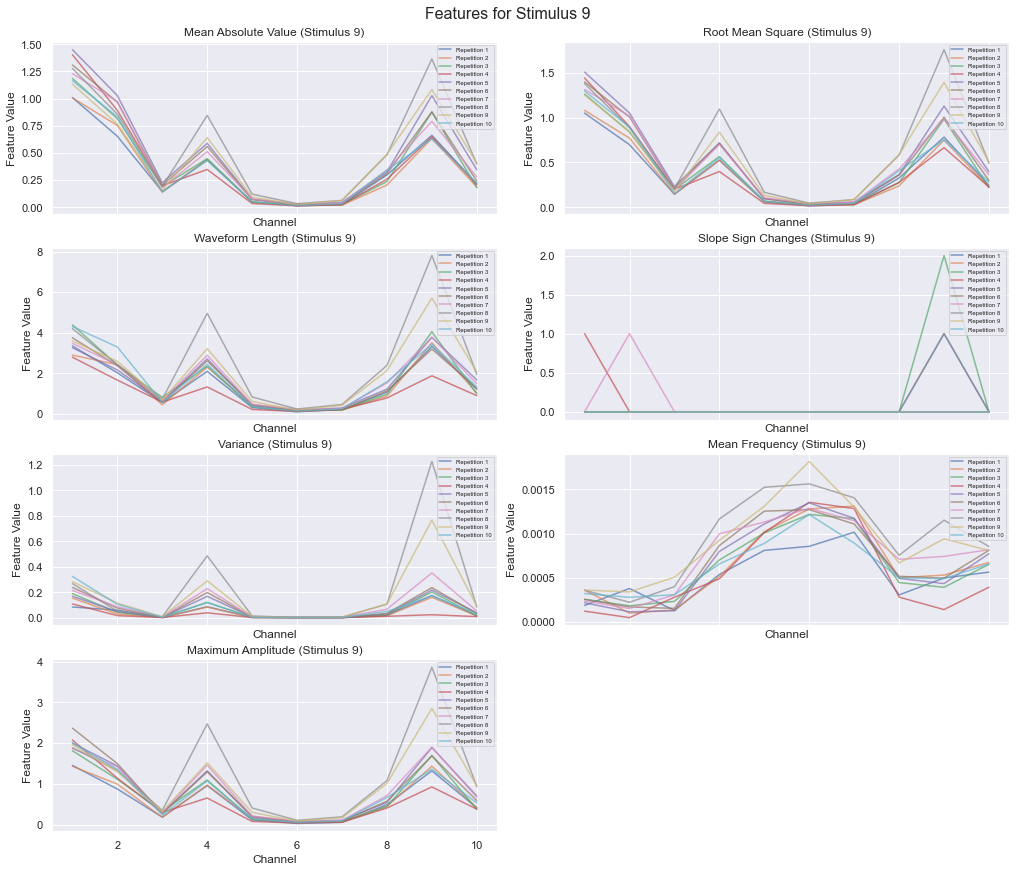

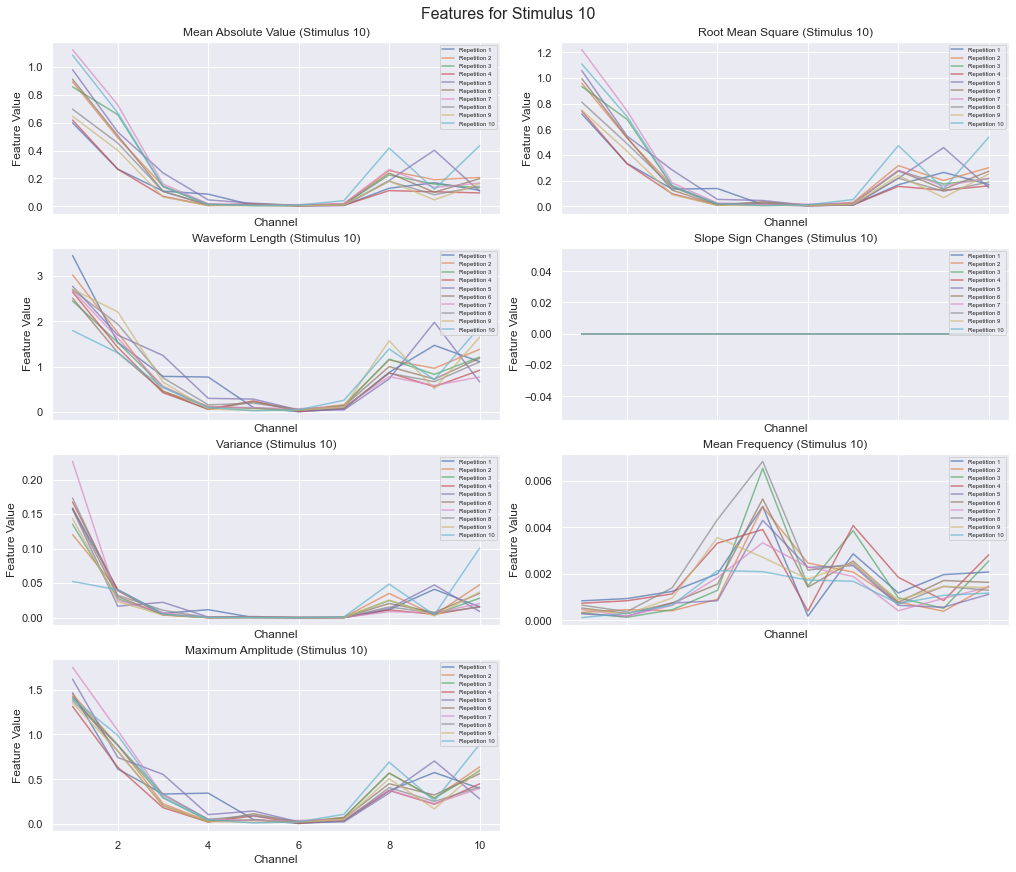

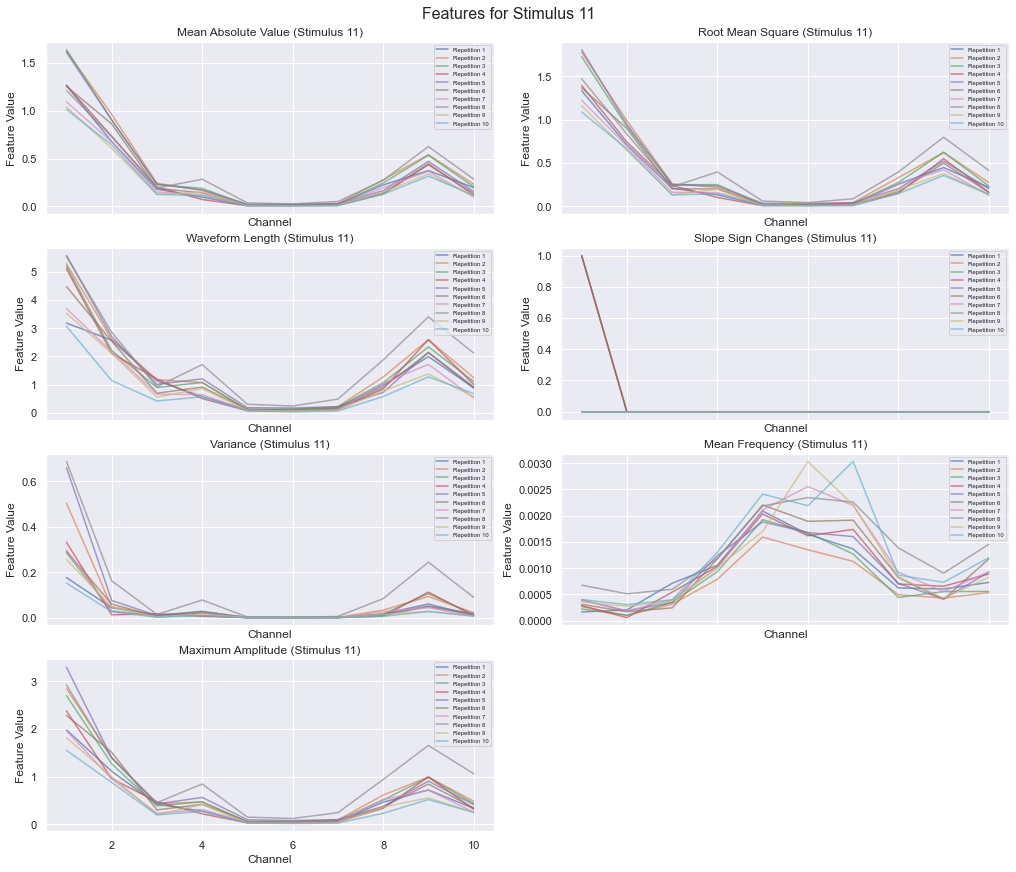

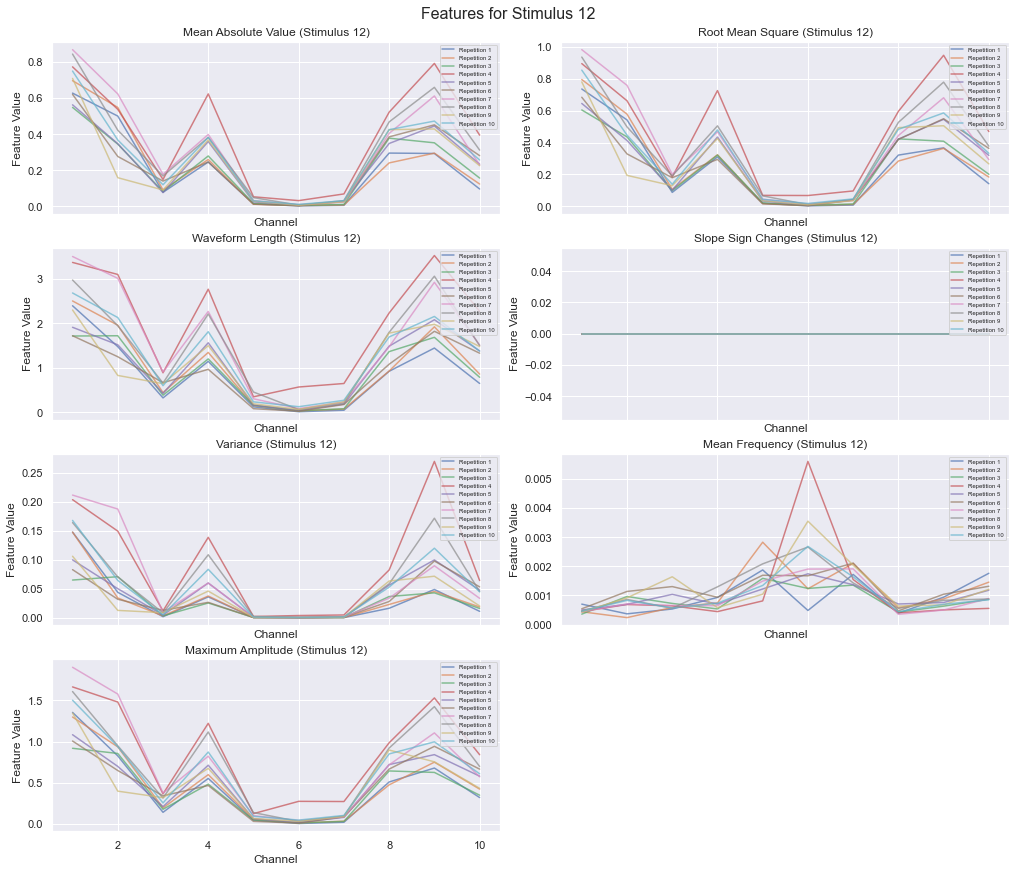

In [7]:
dataset, labels = build_dataset_from_ninapro(emg_envelopes, features=feature_functions, exclude_list=None)
plot_features_by_stimulus_and_metric(dataset, labels, n_stimuli = 12, n_repetitions =10, n_channels=10)
